In [44]:
from sklearn import datasets
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [45]:
digits = datasets.load_digits()  # 手写数字数据集
X = digits.data
y = copy.deepcopy(digits.target)

y[digits.target == 9] = 1
y[digits.target != 9] = 0  # 使数据类别不平衡;使其变为二分类问题

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
log_reg = LogisticRegression(solver='sag', max_iter=10000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9755555555555555

In [47]:
y_log_predict = log_reg.predict(X_test)
y_log_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)  # 混淆矩阵(二分类)

array([[403,   2],
       [  9,  36]], dtype=int64)

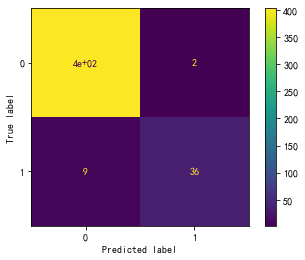

In [49]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_reg, X_test, y_test)  # 混淆矩阵的热图

In [50]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)  # 查准率(二分类)

0.9473684210526315

In [51]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)  # 召回率(二分类)

0.8

In [52]:
from sklearn.metrics import f1_score

f1_score(y_test, y_log_predict)  # F1值(二分类)

0.8674698795180723

In [53]:
from sklearn.metrics import precision_recall_curve

decision_scores = log_reg.decision_function(X_test)  # 计算样本到分离超平面的有符号距离
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [54]:
print(precisions.shape)  # 不同thresholds下的查准率,shape = [n_thresholds + 1]
print(recalls.shape)  #  不同thresholds下的查全率,shape = [n_thresholds + 1]
print(thresholds.shape)

(149,)
(149,)
(148,)


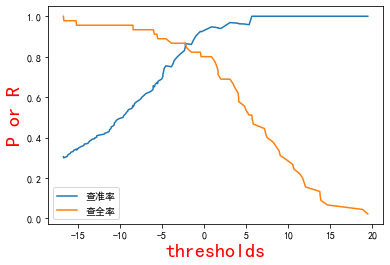

In [55]:
plt.plot(thresholds, precisions[:-1], label='查准率')
plt.plot(thresholds, recalls[:-1], label='查全率')
plt.legend()
plt.xlabel('thresholds', color='red', size=20)
plt.ylabel('P or R', color='red', size=20)
plt.show()

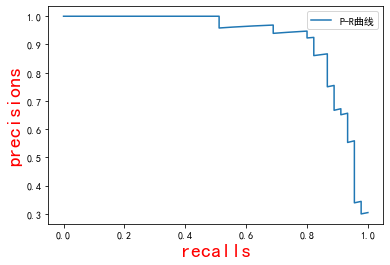

In [56]:
# 手工绘制实现P-R曲线
plt.plot(recalls, precisions, label='P-R曲线')  # 绘制P-R曲线(仅二分类)
plt.legend()
plt.xlabel('recalls', color='red', size=20)
plt.ylabel('precisions', color='red', size=20)
plt.show()

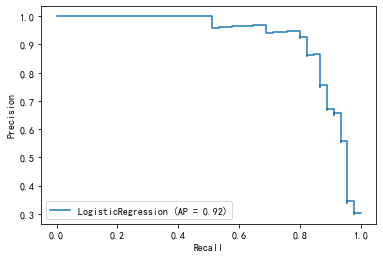

In [57]:
# sklearn包实现
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(log_reg, X_test, y_test)